In [51]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('train.csv')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Questions

Let's perform some one-way ANOVA tests on Age by both Sex - {male, female} - as well as Survived - {0, 1}.

Male mean age: 30.727
Female mean age: 27.916

Results of one-way ANOVA test:
	Reached statistical significance at: 0.013
	Means are statistically different


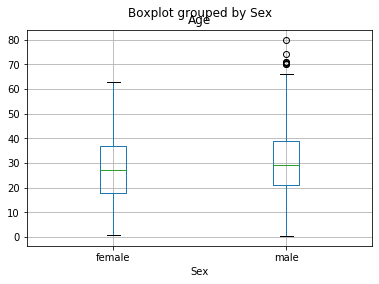

In [104]:
df.boxplot(column='Age', by='Sex')

t_value, p_value = stats.f_oneway(df[df['Sex'] == 'male']['Age'].dropna(),
                                  df[df['Sex'] == 'female']['Age'].dropna())

# Some custom pretty-printing of statistical results. 
# We simply print two things:
# (1) the means of Age by either sex
# (2) the results of the one-way ANOVA, with a simple logic gate at 0.05 for p_value
print(f"Male mean age: {round(np.mean(df[df['Sex'] == 'male']['Age']), 3)}")
print(f"Female mean age: {round(np.mean(df[df['Sex'] == 'female']['Age']), 3)}")
print()
print('Results of one-way ANOVA test:')
if p_value <= 0.05:
    print(f'\tReached statistical significance at: {round(p_value, 3)}')
    print('\tMeans are statistically different')
else:
    print(f'\tFailed to reach statistical significance at: {round(p_value, 3)}')
    print('\tMeans are NOT statistically different')

Survived mean age: 28.344
Did not survive mean age: 30.626

Results of one-way ANOVA test:
	Reached statistical significance at: 0.039
	Means are statistically different


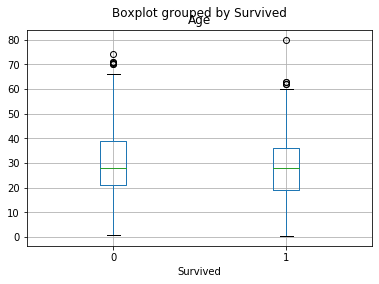

In [105]:
df.boxplot(column='Age', by='Survived')

t_value, p_value = stats.f_oneway(df[df['Survived'] == 0]['Age'].dropna(),
                                  df[df['Survived'] == 1]['Age'].dropna())

# Some custom pretty-printing of statistical results. 
# We simply print two things:
# (1) the means of Age by either sex
# (2) the results of the one-way ANOVA, with a simple logic gate at 0.05 for p_value
print(f"Survived mean age: {round(np.mean(df[df['Survived'] == 1]['Age']), 3)}")
print(f"Did not survive mean age: {round(np.mean(df[df['Survived'] == 0]['Age']), 3)}")
print()
print('Results of one-way ANOVA test:')
if p_value <= 0.05:
    print(f'\tReached statistical significance at: {round(p_value, 3)}')
    print('\tMeans are statistically different')
else:
    print(f'\tFailed to reach statistical significance at: {round(p_value, 3)}')
    print('\tMeans are NOT statistically different')

Was survival related to the amount spent on the ticket? To mix things up, let's compute some percentiles.

Did not survive:
	25th Percentile: 7.8542
	50th Percentile: 10.5
	75th Percentile: 26.0
Did survive:
	25th Percentile: 12.475
	50th Percentile: 26.0
	75th Percentile: 57.0


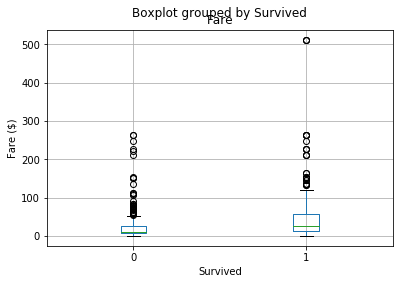

In [90]:
# Creating the boxplot
df.boxplot(column='Fare', by='Survived')
plt.ylabel('Fare ($)')

# Computing percentiles of the data [25, 50, 75] and storing them into a dictionary 
# There is a very strong outlier in Fare (>500), so means would potentially be misleading
outcome_dict = dict()
for outcome in np.unique(df['Survived']):
    outcome_dict[outcome] = dict()
    outcome_dict[outcome]['25%'] = np.percentile(df[df['Survived'] == outcome]['Fare'], 25)
    outcome_dict[outcome]['50%'] = np.percentile(df[df['Survived'] == outcome]['Fare'], 50)
    outcome_dict[outcome]['75%'] = np.percentile(df[df['Survived'] == outcome]['Fare'], 75)

# There are some pretty-printing options for python, but none of them seemed to print the dictionary in such
# a way that was satisfactory to me. So, I've just written a small loop that prints the contents of outcome_dict
for outcome in outcome_dict.keys():
    if outcome == 0:
        print('Did not survive:')
        print(f'\t25th Percentile: {outcome_dict[outcome]["25%"]}')
        print(f'\t50th Percentile: {outcome_dict[outcome]["50%"]}')
        print(f'\t75th Percentile: {outcome_dict[outcome]["75%"]}')
    else:
        print('Did survive:')
        print(f'\t25th Percentile: {outcome_dict[outcome]["25%"]}')
        print(f'\t50th Percentile: {outcome_dict[outcome]["50%"]}')
        print(f'\t75th Percentile: {outcome_dict[outcome]["75%"]}')

Is age correlated with fare? We will split this one into three cells below

Global:
	Correlation: 0.096
	P-value: 0.01


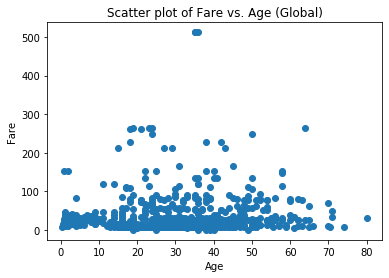

In [133]:
# Unfortunately, there are many missing values in the DataFrame. In order to compute the correlation, we need
# to drop these values. We should be careful, however, as simply using the .dropna() method on the entire
# DataFrame GREATLY reduces the sample size. We should be more targeted in our approach. 
# As such, we use the arg "subset" in the .dropna() method to only drop rows that have NaNs in the rows that
# we care about
df_nona = df.dropna(subset=['Age', 'Fare'])

# Let's gather three levels of correlation between Age and Fare
# (1) The global level (no splitting of the data)
# (2) Correlation split by gender
# (3) Correlation split by survival
global_corr = stats.pearsonr(df_nona['Age'], df_nona['Fare'])

male_split_corr = stats.pearsonr(df_nona[df_nona['Sex'] == 'male']['Age'],
                                 df_nona[df_nona['Sex'] == 'male']['Fare'])
female_split_corr = stats.pearsonr(df_nona[df_nona['Sex'] == 'female']['Age'],
                                   df_nona[df_nona['Sex'] == 'female']['Fare'])

survived_split_corr = stats.pearsonr(df_nona[df_nona['Survived'] == 1]['Age'],
                                     df_nona[df_nona['Survived'] == 1]['Fare'])
nosurvived_split_corr = stats.pearsonr(df_nona[df_nona['Survived'] == 0]['Age'],
                                       df_nona[df_nona['Survived'] == 0]['Fare'])

# Now let's go ahead and create a plot for each one of these
plt.title('Scatter plot of Fare vs. Age (Global)')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.scatter(df['Age'], df['Fare'])

print('Global:')
print(f'\tCorrelation: {round(global_corr[0], 3)}')
print(f'\tP-value: {round(global_corr[1], 3)}')

By sex...

By Sex:
	Male:
		Correlation: 0.077
		P-value: 0.1
	Female:
		Correlation: 0.171
		P-value: 0.005


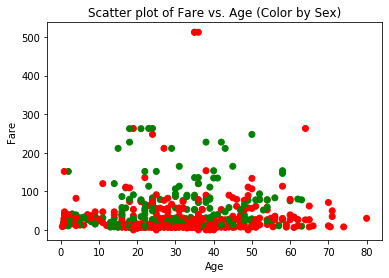

In [136]:
plt.title('Scatter plot of Fare vs. Age (Color by Sex)')
plt.ylabel('Fare')
plt.xlabel('Age')
colormap = ['r' if x == 'male' else 'g' for x in df['Sex']]
plt.scatter(df['Age'], df['Fare'], c=colormap)

print('By Sex:')
print('\tMale:')
print(f'\t\tCorrelation: {round(male_split_corr[0], 3)}')
print(f'\t\tP-value: {round(male_split_corr[1], 3)}')
print('\tFemale:')
print(f'\t\tCorrelation: {round(female_split_corr[0], 3)}')
print(f'\t\tP-value: {round(female_split_corr[1], 3)}')

By survival...

By Survival:
	Survived:
		Correlation: 0.163
		P-value: 0.005
	Did not survive:
		Correlation: 0.077
		P-value: 0.114


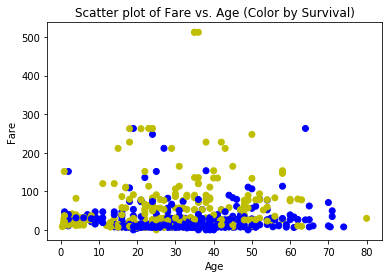

In [137]:
plt.title('Scatter plot of Fare vs. Age (Color by Survival)')
plt.ylabel('Fare')
plt.xlabel('Age')
colormap = ['y' if x == 1 else 'b' for x in df['Survived']]
plt.scatter(df['Age'], df['Fare'], c = colormap)

print('By Survival:')
print('\tSurvived:')
print(f'\t\tCorrelation: {round(survived_split_corr[0], 3)}')
print(f'\t\tP-value: {round(survived_split_corr[1], 3)}')
print('\tDid not survive:')
print(f'\t\tCorrelation: {round(nosurvived_split_corr[0], 3)}')
print(f'\t\tP-value: {round(nosurvived_split_corr[1], 3)}')

## An interesting graph

In [156]:
# Let's see if the location of the cabin makes a difference in the survival rate...
df['cabin_code'] = [x[0] if isinstance(x, str) else 'missing' for x in df['Cabin']]

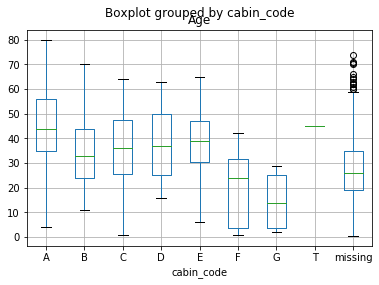

In [158]:
df.boxplot(column='Age', by='cabin_code')

In [162]:
for code in np.unique(df['cabin_code']):
    print(f'{code}:')
    print(f"\tP(Survival): {round(np.mean(df[df['cabin_code'] == code]['Survived']), 3)}")
    print(f"\tCost: ${round(np.mean(df[df['cabin_code'] == code]['Fare']), 3)}")
    print(f"\tn: {len(df[df['cabin_code'] == code])}")

A:
	P(Survival): 0.467
	Cost: $39.624
	n: 15
B:
	P(Survival): 0.745
	Cost: $113.506
	n: 47
C:
	P(Survival): 0.593
	Cost: $100.151
	n: 59
D:
	P(Survival): 0.758
	Cost: $57.245
	n: 33
E:
	P(Survival): 0.75
	Cost: $46.027
	n: 32
F:
	P(Survival): 0.615
	Cost: $18.697
	n: 13
G:
	P(Survival): 0.5
	Cost: $13.581
	n: 4
T:
	P(Survival): 0.0
	Cost: $35.5
	n: 1
missing:
	P(Survival): 0.3
	Cost: $19.157
	n: 687


In [165]:
code_subset = ['B', 'C', 'D', 'E']



deck_dict = {
    'cabin_code': [],
    'P(survival)': []
}

for code in np.unique(df['cabin_code']):
    if code in code_subset:
        deck_dict['cabin_code'].append(code)
        deck_dict['P(survival)'].append(round(np.mean(df[df['cabin_code'] == code]['Survived']), 3))
    else:
        continue
    
df_deck = pd.DataFrame(deck_dict)

<BarContainer object of 4 artists>

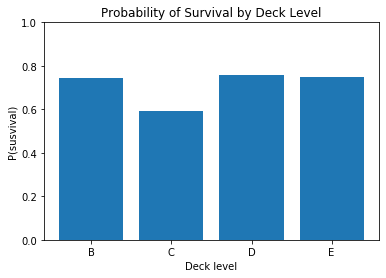

In [173]:
plt.title('Probability of Survival by Deck Level')
plt.ylabel('P(susvival)')
plt.xlabel('Deck level')
plt.ylim(0, 1)
plt.bar(height=df_deck['P(survival)'], x=df_deck['cabin_code'])
plt.savefig('/')